2. The dataset consists of quarterly sales data of Coca-Cola from 1986 to 1996. Predict sales for the next two years by using time series forecasting and prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_excel('C:/Users/vaibh/Desktop/360 Digitmg/Time Series/Assignment/CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.shape

(42, 2)

In [4]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [5]:
# Datatypes of the feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
# checking for null values
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
# checking for duplicated values
df.duplicated().sum()

0

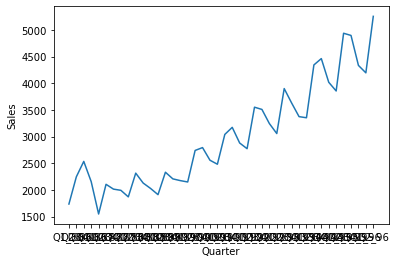

In [8]:
# Line plot 
sns.lineplot(x = df.Quarter, y = df.Sales)
plt.show()

    We can see an upward trend with seasonality

In [9]:
# Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df.Sales, autolag='AIC')
dfoutput = pd.Series(dftest, index=['Test Statistic', 'p-value', '#lags Used',\
                                       'Number of Observations Used','Critical Values','icbest'])
dfoutput

Test Statistic                                                          1.309421
p-value                                                                 0.996661
#lags Used                                                                     7
Number of Observations Used                                                   34
Critical Values                {'1%': -3.639224104416853, '5%': -2.9512301791...
icbest                                                                395.663921
dtype: object

p-value is greater than 0.05 meaning we accept the null hypothesis. The variable is non-stationary

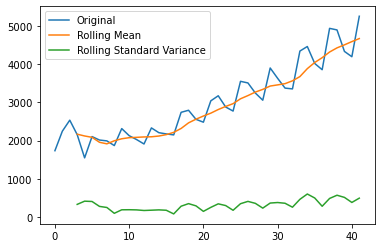

In [10]:
# Rolling Statistics

rolmean = df.Sales.rolling(window=4).mean()
rolvar = df.Sales.rolling(window=4).std()

plt.plot(df.Sales, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.show()

    We can see that the mean is not constant 

In [11]:
# Data Partition
Train = df.head(34)
Test = df.tail(8)

In [12]:
# Mean absolute Percentge Error
MAPE = np.mean(np.abs((rolmean.tail(8) - Test.Sales)/Test.Sales)*100)
MAPE

8.553630515069273

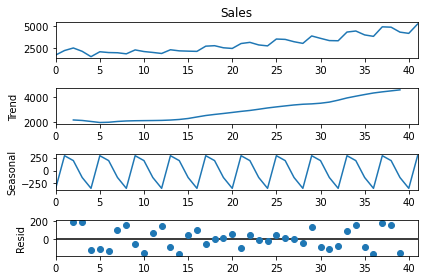

In [13]:
# Decomposing the data to see trend, seasonality using additive model
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Sales, model = "additive", period = 4)

ds_trend = (decompose_ts_add.trend)
ds_seasonal = (decompose_ts_add.seasonal)
ds_resid = (decompose_ts_add.resid)
ds_obser = (decompose_ts_add.observed)

decompose_ts_add.plot()
plt.show()

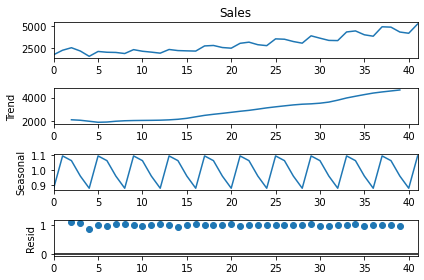

In [14]:
# Decomposing the data to see trend, seasonality using multiplicative model
decompose_ts_mul = seasonal_decompose(df.Sales, model = "multiplicative", period = 4)
decompose_ts_mul.plot()
plt.show()

E:\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


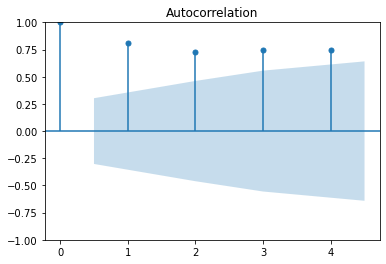

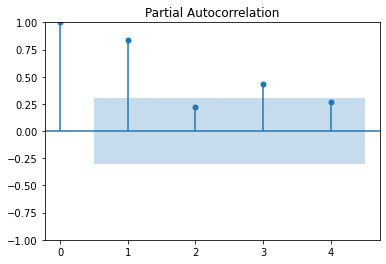

In [15]:
# ACF and PACF plot on Original data sets 

import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(df.Sales, lags = 4)
tsa_plots.plot_pacf(df.Sales, lags = 4)
plt.show()

In [16]:
# Simple Exponential Method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE_ses = np.mean(np.abs((pred_ses - Test.Sales)/Test.Sales)*100)
MAPE_ses 

13.843134612946365

In [17]:
# Holt Method
from statsmodels.tsa.holtwinters import Holt

holt_model = Holt(Train.Sales).fit()
pred_holt = holt_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE_holt = np.mean(np.abs((pred_holt - Test.Sales) / Test.Sales)*100)
MAPE_holt 

10.77203535475792

In [18]:
# Holts winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

hwe_model_add_add = ExponentialSmoothing(Train["Sales"], seasonal = "add", trend = "add", seasonal_periods = 4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE_hwe_add_add = np.mean(np.abs((pred_hwe_add_add - Test.Sales) / Test.Sales)*100)
MAPE_hwe_add_add

5.753226666907805

In [19]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE_hwe_mul_add = np.mean(np.abs((pred_hwe_mul_add - Test.Sales) / Test.Sales)*100)
MAPE_hwe_mul_add

4.070090734654781

In [20]:
# Final Model on 100% Data
hwe_fmodel_mul_add = ExponentialSmoothing(df.Sales, seasonal = "mul", trend = "add", seasonal_periods = 4).fit()

In [21]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [22]:
# Predicting for next 2 years

Pred_Table = pd.DataFrame(data=['Q3_96', 'Q4_96','Q1_97','Q2_97','Q3_97', 'Q4_97','Q1_98','Q2_98' ], \
                          index=[42,43,44,45,46,47,48,49], columns=['Quarter'])
Pred_Table

,Quarter
42,Q3_96
43,Q4_96
44,Q1_97
45,Q2_97
46,Q3_97
47,Q4_97
48,Q1_98
49,Q2_98


In [23]:
Pred_Table['Sales'] = hwe_fmodel_mul_add.predict(start = Pred_Table.index[0], end = Pred_Table.index[-1])
Pred_Table.Sales

42    5210.523237
43    4772.600600
44    4517.616864
45    5694.128928
46    5628.160583
47    5147.622526
48    4865.763475
49    6124.648114
Name: Sales, dtype: float64

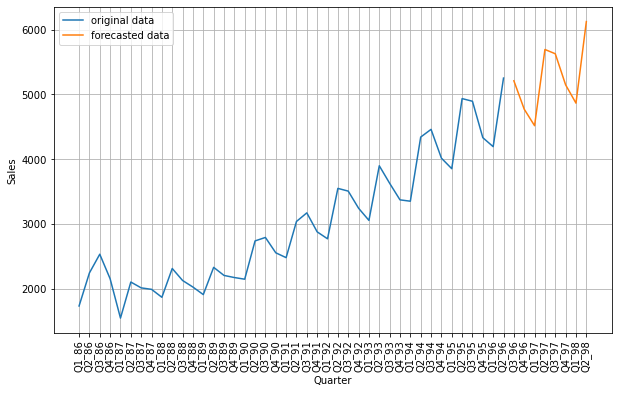

In [24]:
# Plotting forecasted and original data
plt.figure(figsize=(10,6))
sns.lineplot(y = df.Sales, x = df.Quarter, label = 'original data')
sns.lineplot(y = Pred_Table.Sales, x = Pred_Table.Quarter, label = 'forecasted data')
plt.xticks(rotation = 90)
plt.legend(loc='best')
plt.grid('on')
plt.show()